### TAREA 2 cosmologia
Alejandro Gutierrez

20677580-7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import camb

## P4

In [8]:
# Constantes
H0 = 67 # km/(s*Mpc)
omat = 0.3 # Omega_m,0
orad = 10**-4 # Omega_r,0
ode = 1 - omat - orad  

In [9]:
# funciones
def H(a):
    r = (orad*a**-4 + omat*a**-3 + ode*a**-3)
    return np.sqrt(r)*H0 

In [14]:
# arrays
k_arr = [H0, 5*H0, 20*H0, 200*H0]

In [42]:
def sistema(a, Y, k):
    d, o = Y  # Y = [d(a), o(a)] = [delta(a),theta(a)]
    denominador = (1 + 9*omat*H0**2/(2*a*k**2)) 
    dddx = ((9*omat*d*H0**2)/(2*(k*a)**2) - o/(H(a)*a**2))/denominador
    dodx = -o/a - 3*omat*d*H0**2 / (2*H(a)*a**3)
    return [dddx, dodx]

# Condiciones iniciales
d0 = 10**-4
o0 = 10**-4

a_span = (10**-4, 1)
a_eval = np.linspace(10**-4, 1, 500)
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))

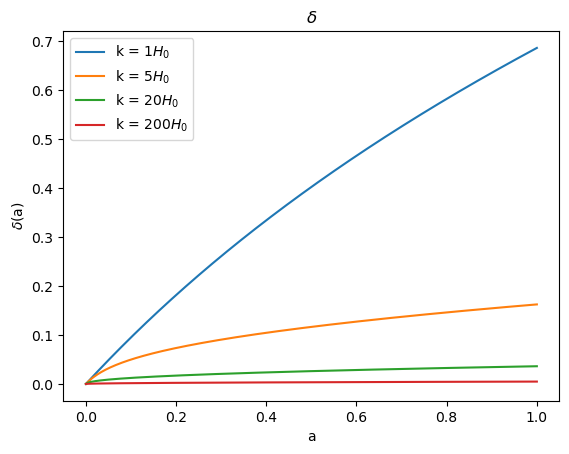

In [52]:
plt.xlabel("a")
plt.ylabel(r"$\delta$(a)")
plt.title(r"$\delta$")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    plt.plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

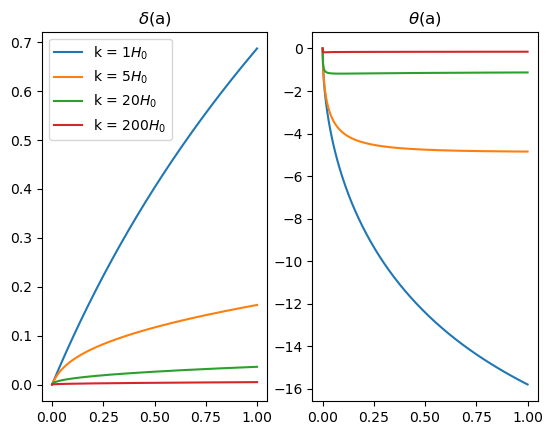

In [56]:
fig, ax = plt.subplots(1,2)
ax[0].set_title(r"$\delta$(a)")
ax[1].set_title(r"$\theta$(a)")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    ax[0].plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
    ax[1].plot(sol.t, sol.y[1], label=f'k = {int(i/H0)}$H_{0}$')
ax[0].legend()
#ax[1].legend()
plt.show

==================================

In [3]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

In [64]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk,mnu=0,num_massive_neutrinos=0)
pars.set_dark_energy(w=-1);

In [65]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)

pars.set_matter_power(redshifts=redshifts,kmax=1)

results = camb.get_results(pars)

kh,z,pk = results.get_linear_matter_power_spectrum(hubble_units=True,k_hunit=True)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 0, 'k [h/Mpc]')

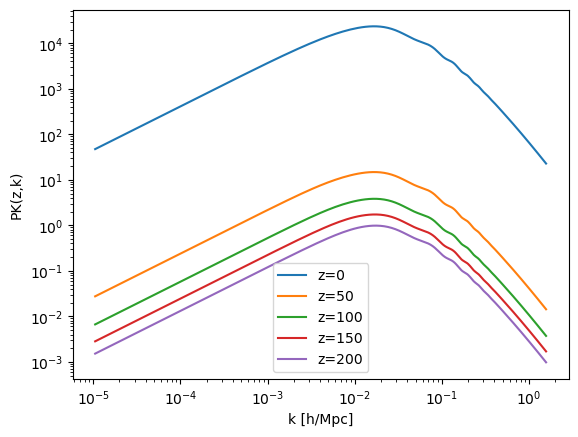

In [66]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh,pk[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel('PK(z,k)')
plt.xlabel('k [h/Mpc]')

In [67]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts,kmax=1)
results = camb.get_results(pars)
kh_nl,z_nl,pk_nl = results.get_matter_power_spectrum(minkh=1e-4)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 0, 'k [h/Mpc]')

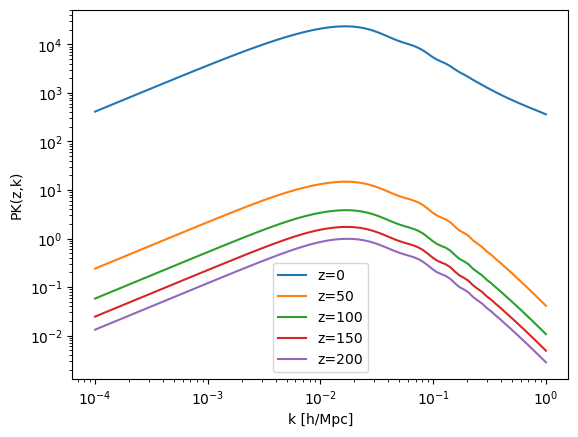

In [68]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh_nl,pk_nl[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel('PK(z,k)')
plt.xlabel('k [h/Mpc]')

In [69]:
powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
for i in powers: print(i)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [70]:
unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])

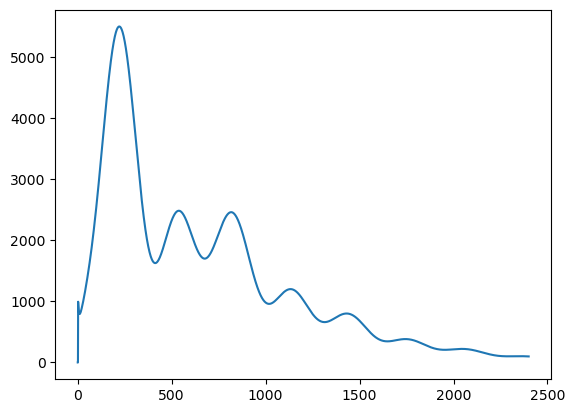

In [71]:
plt.plot(ells,unlesed[:,0])